In [1]:
import matplotlib.pyplot as plt
import numpy as np

import obspy

from obspy.signal.konnoohmachismoothing import konno_ohmachi_smoothing

import cyko

%matplotlib inline

In [2]:
plt.rcParams['figure.dpi'] = 120

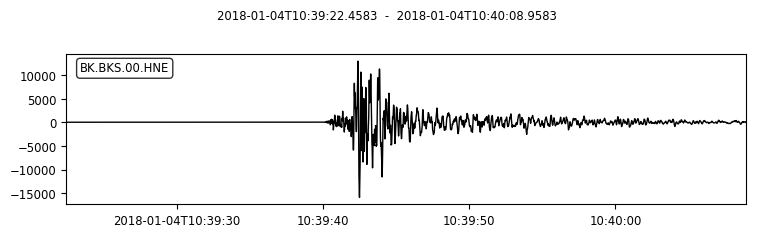

In [3]:
trace = obspy.read('tests/data/example_ts.mseed').traces[0]
trace.plot();

In [4]:
fourier_amps = np.abs(np.fft.rfft(trace.data))
freqs = np.fft.rfftfreq(len(trace), d=trace.stats['delta'])

In [11]:
ko_freqs = np.logspace(-1, 2, num=301)
ko_freqs = ko_freqs[(freqs[0] < ko_freqs) & (ko_freqs < freqs[-1])]

bandwidth = 30

ko_amps = konno_ohmachi_smoothing(fourier_amps, freqs, bandwidth, normalize=True)

In [12]:
cyko_amps = cyko.smooth(freqs, freqs, fourier_amps, bandwidth)

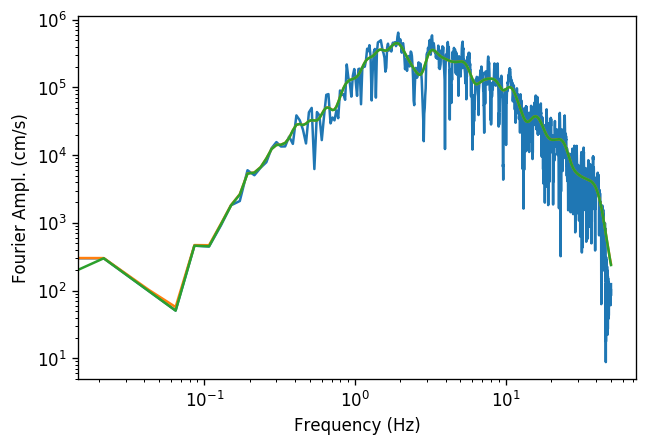

In [13]:
fig, ax = plt.subplots()
ax.plot(freqs, fourier_amps, label='Original')
ax.plot(freqs, ko_amps, label='Smoothed (Obspy)')
ax.plot(freqs, cyko_amps, label='Smoothed (cyko)')
ax.set(
    xlabel='Frequency (Hz)', xscale='log', 
    ylabel='Fourier Ampl. (cm/s)', yscale='log'
)
fig;

In [17]:
mask = (freqs > 0.2)
np.testing.assert_allclose(ko_amps[mask], cyko_amps[mask], rtol=0.01)

AssertionError: 
Not equal to tolerance rtol=0.01, atol=0

Mismatch: 6.87%
Max absolute difference: 814.9318010876887
Max relative difference: 0.04097515281976343
 x: array([ 5560.696914,  6656.529615,  8934.015469, ...,   250.55118 ,
         249.362665,   248.184194])
 y: array([ 5521.748405,  6617.876809,  8893.316328, ...,   240.897027,
         239.651354,   238.415099])

In [19]:
np.savez(
    'tests/data/test_data.npz',
    freqs=freqs, fourier_amps=fourier_amps,
    ko_amps=cyko_amps, bandwidth=bandwidth
)

In [20]:
data = np.load('tests/data/test_data.npz')

In [21]:
data

In [22]:
data.keys()

KeysView(<numpy.lib.npyio.NpzFile object at 0x7f2165665a58>)

In [23]:
np.load?